In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from PIL import Image
import os

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


Using TensorFlow backend.


In [2]:
data=[]
labels=[]
classes=43
cur_dir=os.getcwd()
print(cur_dir)

c:\Users\Shruti\Python VS


In [3]:
#Retrieving images and their labels
for i in range(classes):
    path=os.path.join(cur_dir,'Train',str(i))
    images=os.listdir(path)

    for j in images:
        try:
            image=Image.open(path+'\\'+j)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
           print("Error Loading image")

#Converitng list to numpy arrays
data=np.array(data)
labels=np.array(labels)

In [4]:
#Splitting data to test and train
print(data.shape, labels.shape)
x_train,x_test,y_train,y_test=train_test_split(data, labels, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train=to_categorical(y_train, num_classes=43)
y_test=to_categorical(y_test, num_classes=43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [5]:
#Building and compiling the model

model=Sequential()
model.add(Conv2D(32,(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32,(5,5), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
epochs=15
history=model.fit(x_train, y_train, batch_size=32,epochs=epochs,verbose=1, validation_data=(x_test,y_test))


Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 117s 4ms/step - loss: 2.1702 - accuracy: 0.4511 - val_loss: 0.6091 - val_accuracy: 0.8331
Epoch 2/15
31367/31367 [==============================] - 113s 4ms/step - loss: 0.7775 - accuracy: 0.7693 - val_loss: 0.2758 - val_accuracy: 0.9306
Epoch 3/15
31367/31367 [==============================] - 110s 3ms/step - loss: 0.5288 - accuracy: 0.8445 - val_loss: 0.1951 - val_accuracy: 0.9476
Epoch 4/15
31367/31367 [==============================] - 114s 4ms/step - loss: 0.4016 - accuracy: 0.8817 - val_loss: 0.1563 - val_accuracy: 0.9499
Epoch 5/15
31367/31367 [==============================] - 118s 4ms/step - loss: 0.3623 - accuracy: 0.8943 - val_loss: 0.1289 - val_accuracy: 0.9663
Epoch 6/15
31367/31367 [==============================] - 121s 4ms/step - loss: 0.3433 - accuracy: 0.9036 - val_loss: 0.0875 - val_accuracy: 0.9745
Epoch 7/15
31367/31367 [==============================] - 128s 

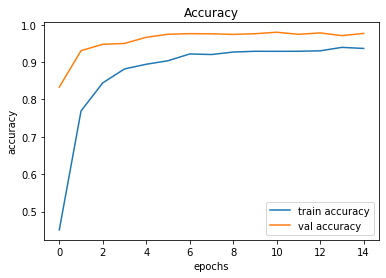

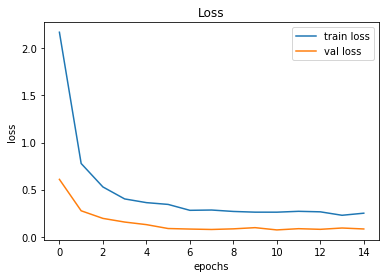

In [7]:
#Visualizing accuracy and loss
plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


In [8]:
#Test accuracy on test dataset
from sklearn.metrics import accuracy_score
import pandas as pd
y_test=pd.read_csv('Test.csv')

labels=y_test['ClassId'].values
pics=y_test['Path'].values

data=[]
for pic in pics:
    image=Image.open(pic)
    image=image.resize((30,30))
    image=np.array(image)
    data.append(image)

x_test=np.array(data)
pred=model.predict_classes(x_test)
accuracy_score(labels,pred)

0.9413301662707838

In [9]:
#Saving the model
model.save('Traffic_classifier.h5')